Data:Data：https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data; Tutorial:https://www.bilibili.com/video/BV1iJ41127cw?p=3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set plot size
plt.style.use({'figure.figsize':(25,25)})

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

##### Variables  
CRIM - per capita crime rate by town 每个城镇人均犯罪率  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 超过25000平方英尺用地华为居住用地的百分比  
INDUS - proportion of non-retail business acres per town.非零售商用地百分比  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 是否靠近查尔斯河  
NOX - nitric oxides concentration (parts per 10 million)氮氧化物浓度  
RM - average number of rooms per dwelling 住宅平均房间数目  
AGE - proportion of owner-occupied units built prior to 1940 1940年前建成自用单位比例  
DIS - weighted distances to five Boston employment centres 到5个波士顿就业服务中心的加权句丽   
RAD - index of accessibility to radial highways 无障碍径向高速公路指数  
TAX - full-value property- tax rate per 10000dollars 每万元物业税率  
PTRATIO - pupil-teacher ratio by town 小学师生比例       
B-1000(Bk-0.63)^2 where Bk is the proportion of blacks by town 黑人比例    
LSTAT - %lower status of the population 下层经济阶层比例   
MEDV - Median value of owner-occupied homes in$1000's 业主自住房屋中值

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
df.shape

(506, 14)

In [7]:
# Alternatively
# from sklearn.datasets import load_boston
# df=load_boston()
# df.target, df.data, df.feature_names, df.DESCR

### EDA

In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PIRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.isnull().any().sum() # 无缺失值

0

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Data Visualization

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PIRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

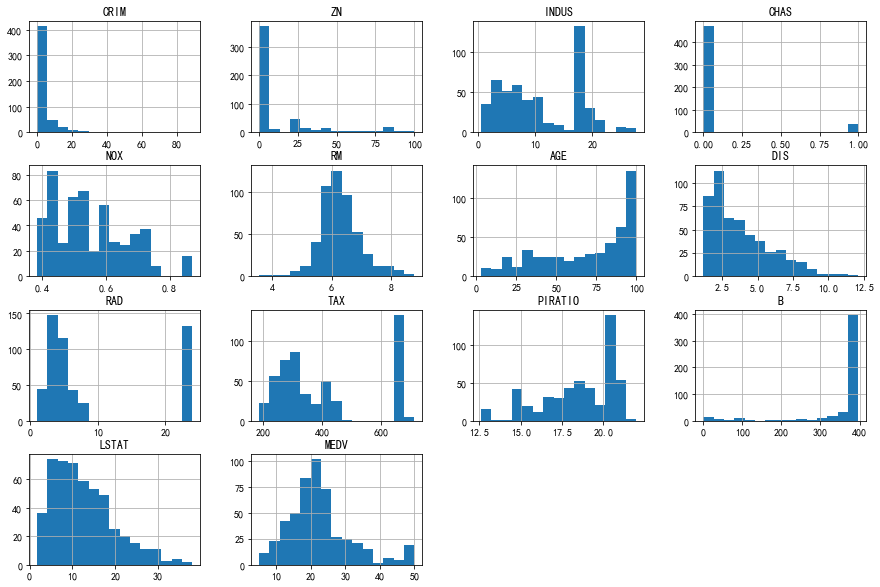

In [13]:
plt.style.use({'figure.figsize':(15,10)})
df.hist(bins=15)

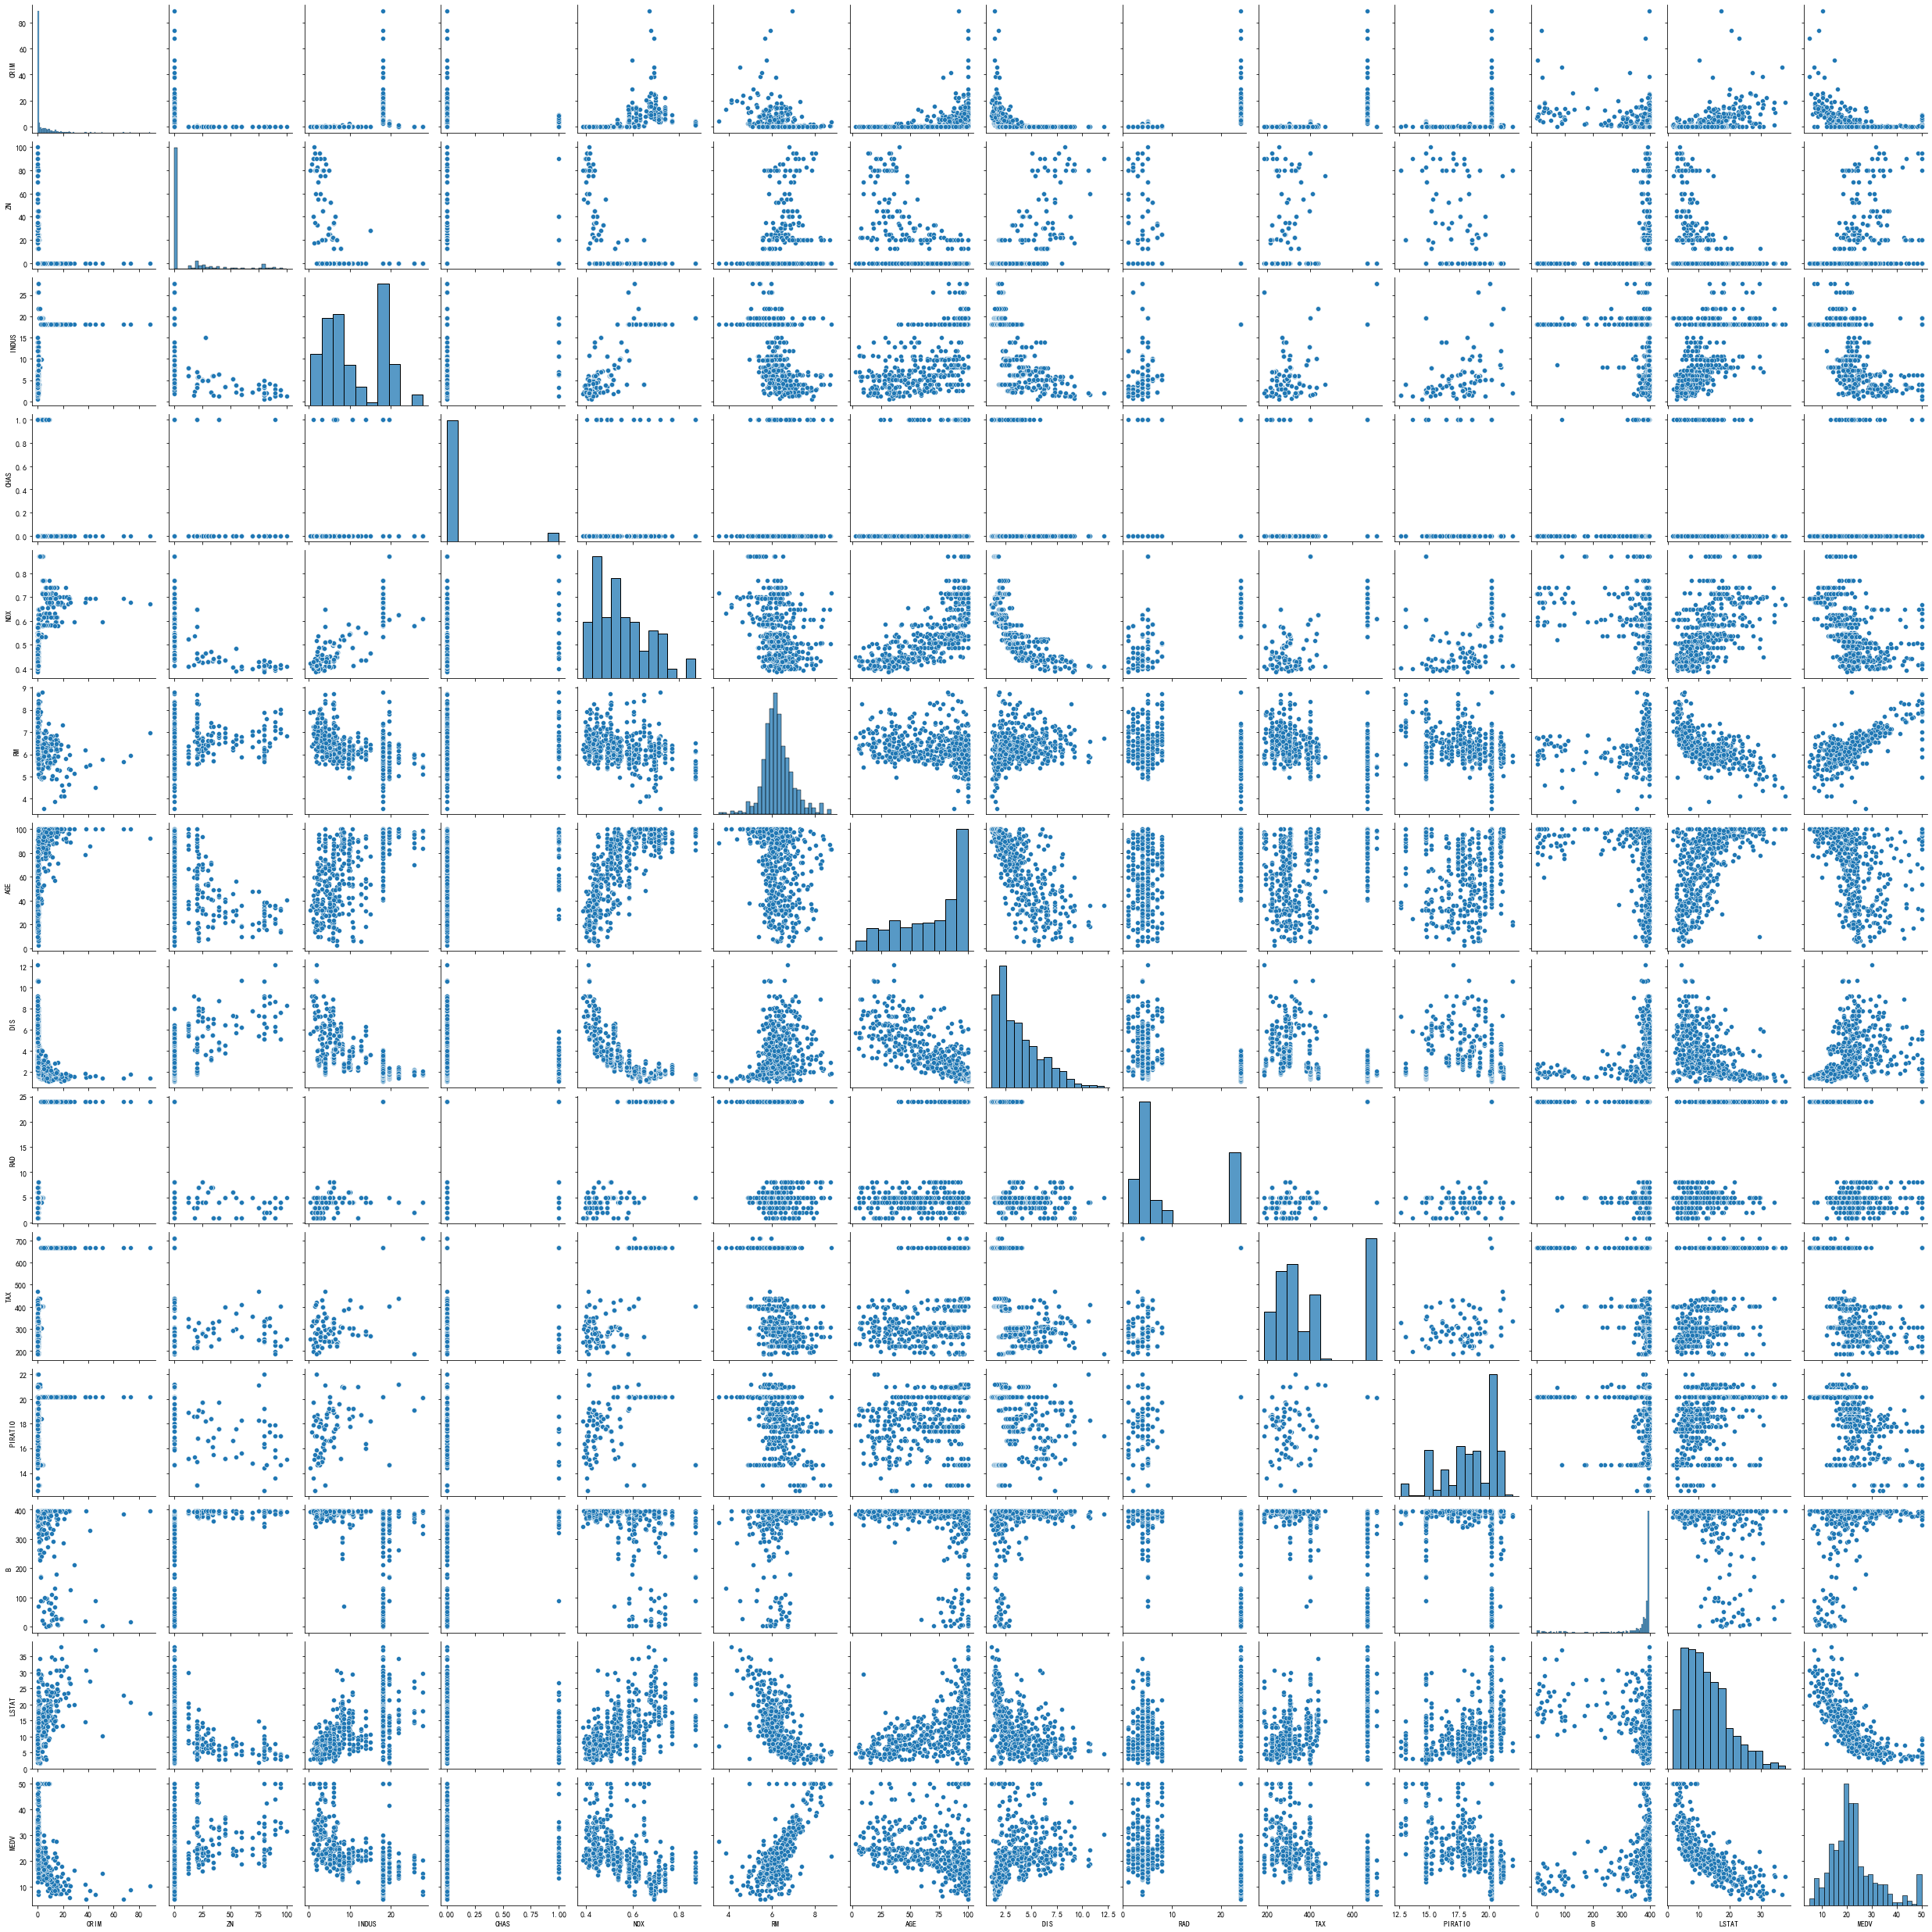

In [14]:
# 绘制变量之间两两关系的散点图 1minute
sns.pairplot(df)

<AxesSubplot:>

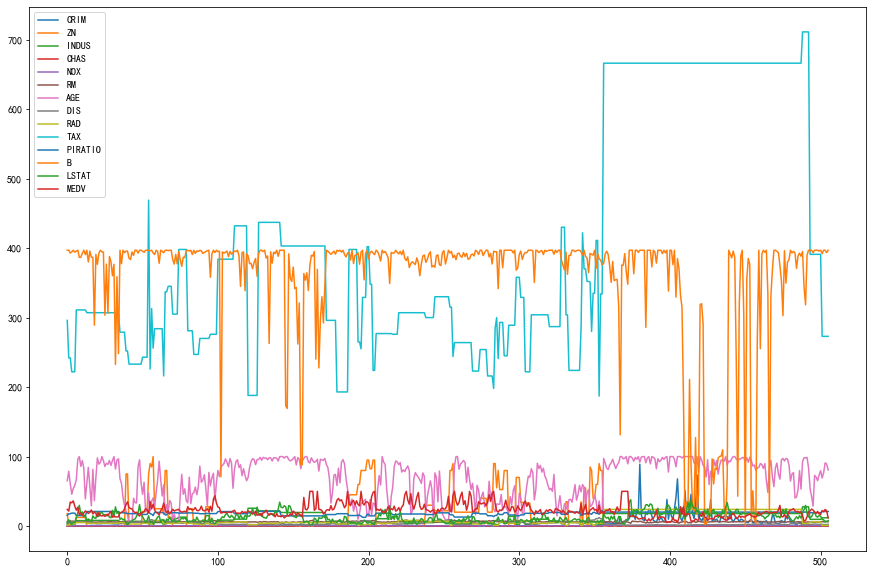

In [15]:
df.plot()

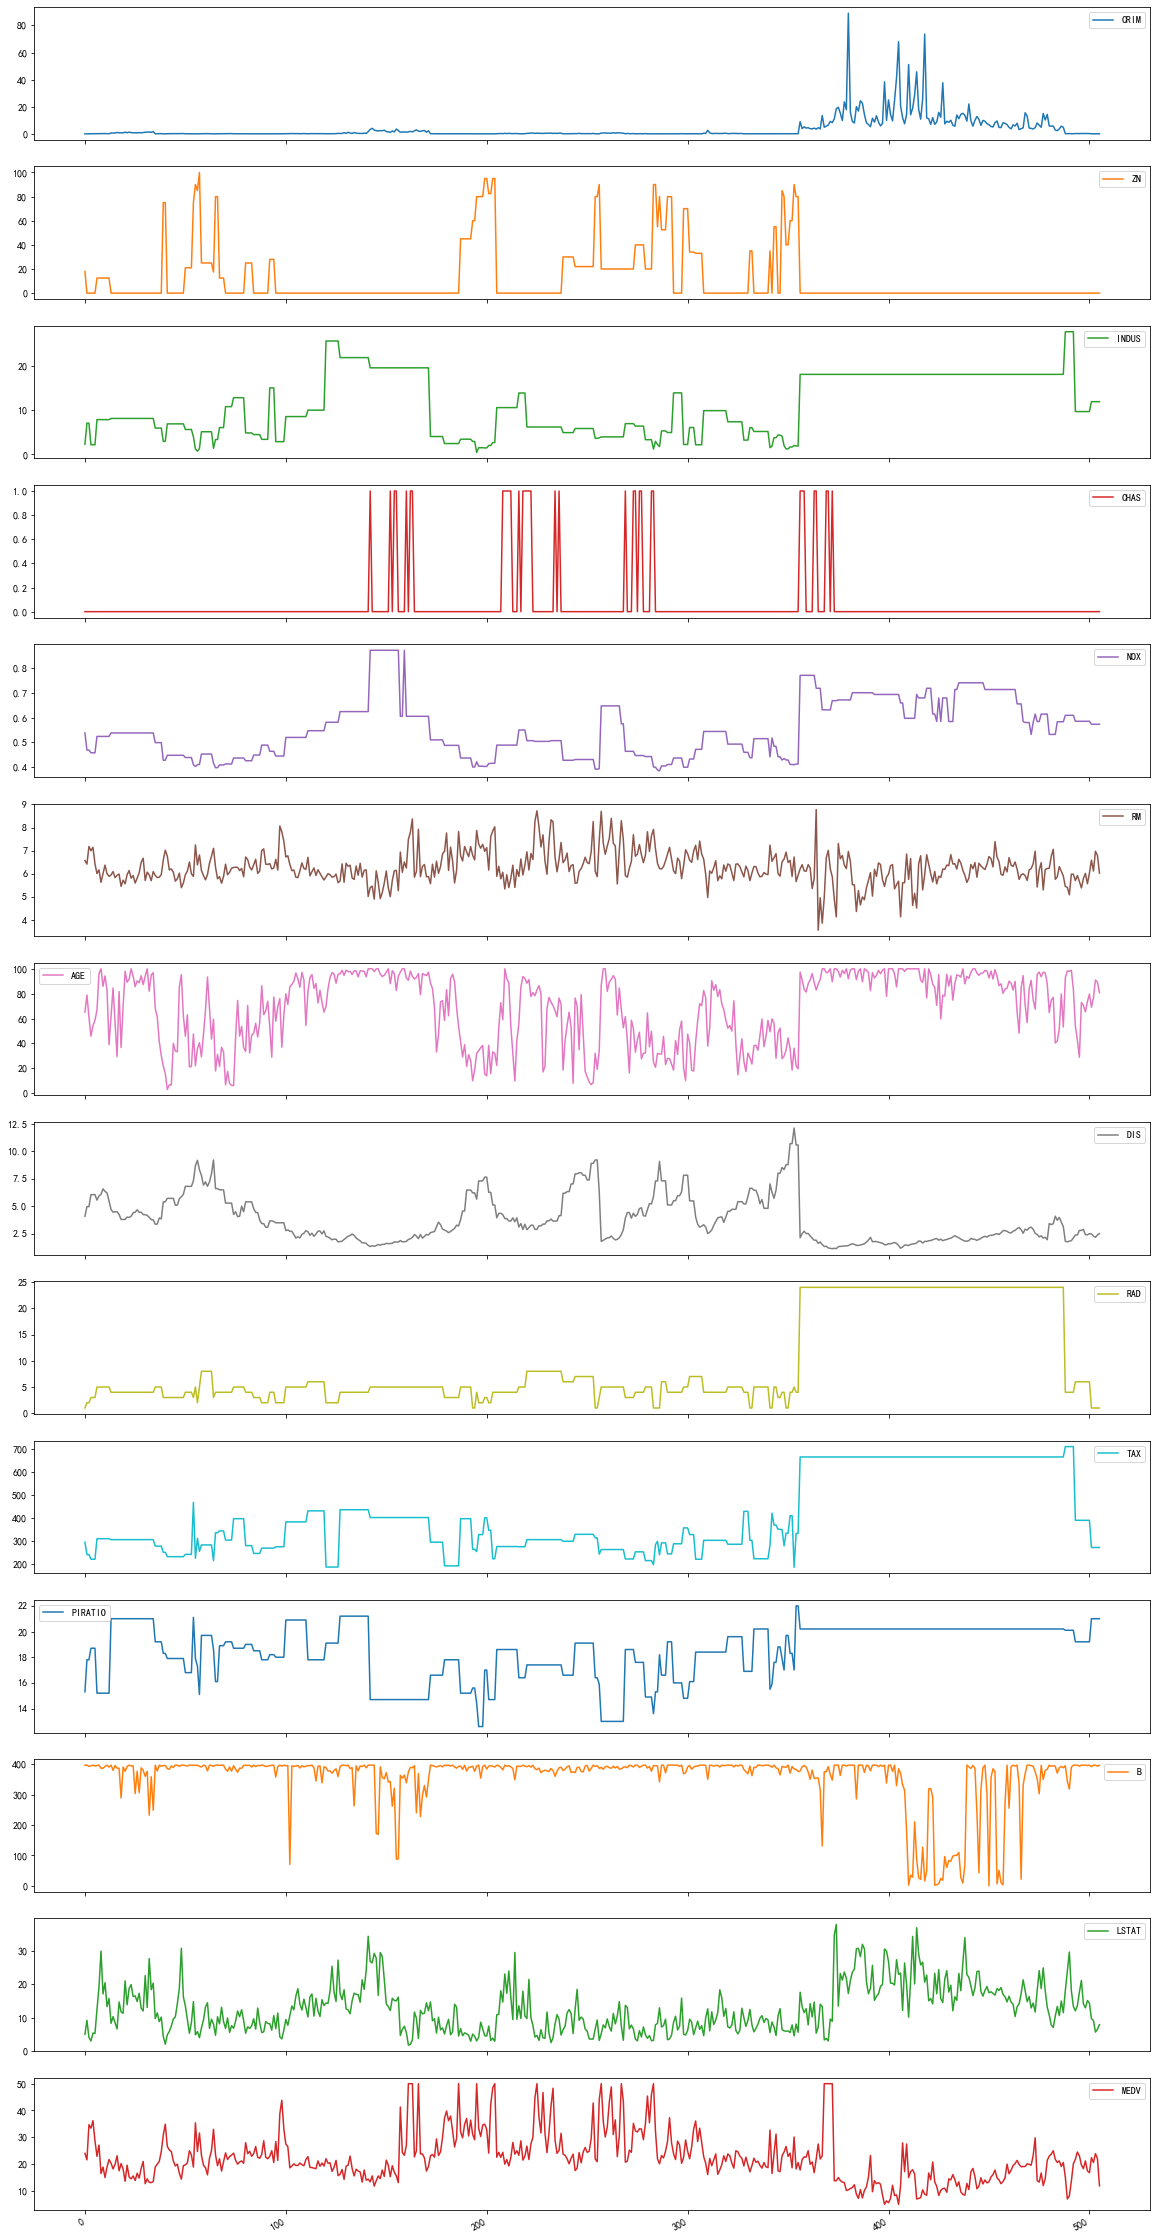

In [16]:
df.plot(subplots=True,figsize=(20,45))
plt.show()

<AxesSubplot:ylabel='Frequency'>

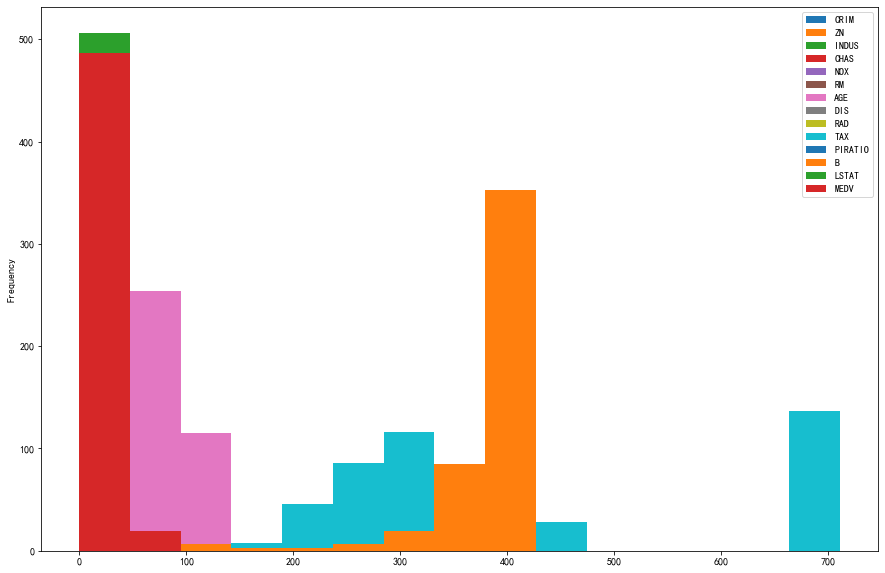

In [17]:
df.plot(kind='hist',bins=15)

Text(0.5, 1.0, '波士顿房价数据集，一些特征的箱型图')

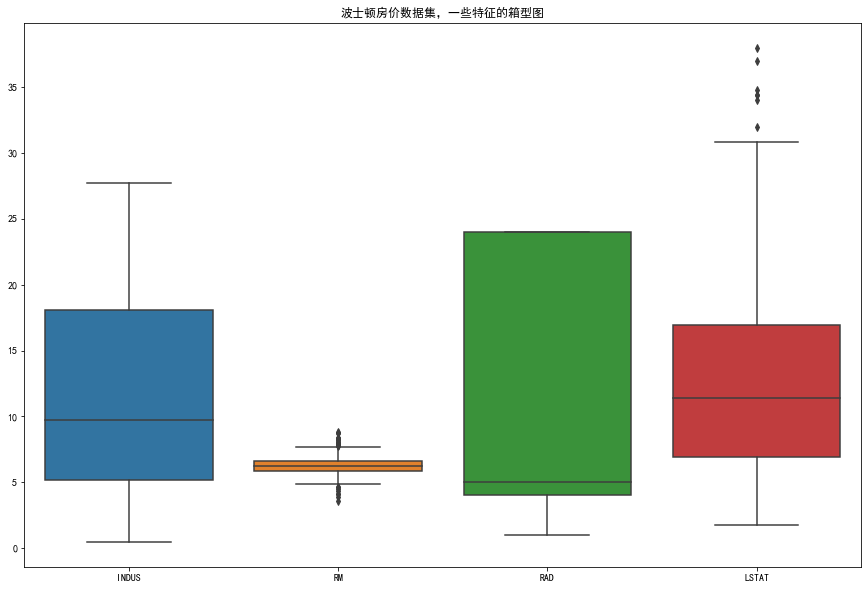

In [18]:
sns.boxplot(data=df[['INDUS','RM','RAD','LSTAT']])
plt.title('波士顿房价数据集，一些特征的箱型图')

Text(0.5, 1.0, '波士顿房价数据集，一些特征的小提琴图')

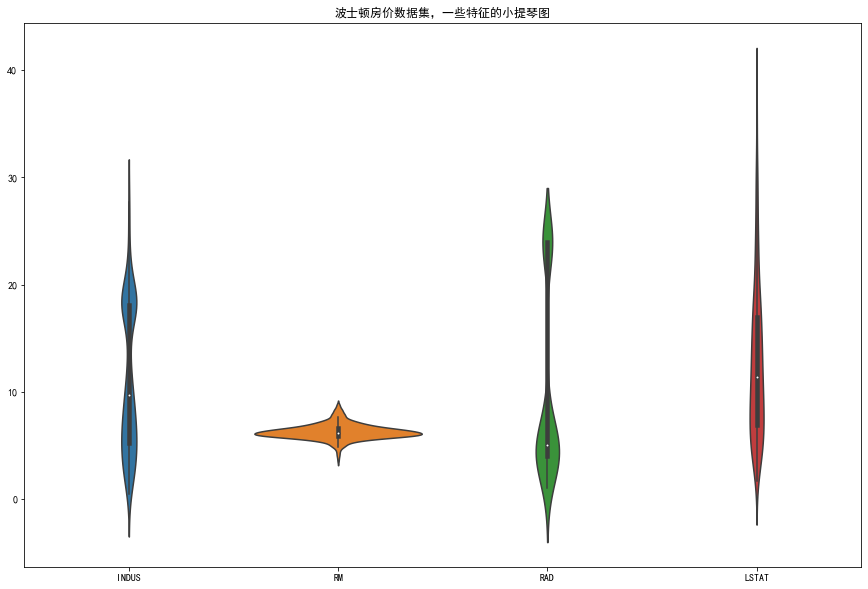

In [19]:
sns.violinplot(data=df[['INDUS','RM','RAD','LSTAT']])
plt.title('波士顿房价数据集，一些特征的小提琴图')
# 曲线反映数据在频段上的分布密度

C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INDUS', ylabel='Density'>

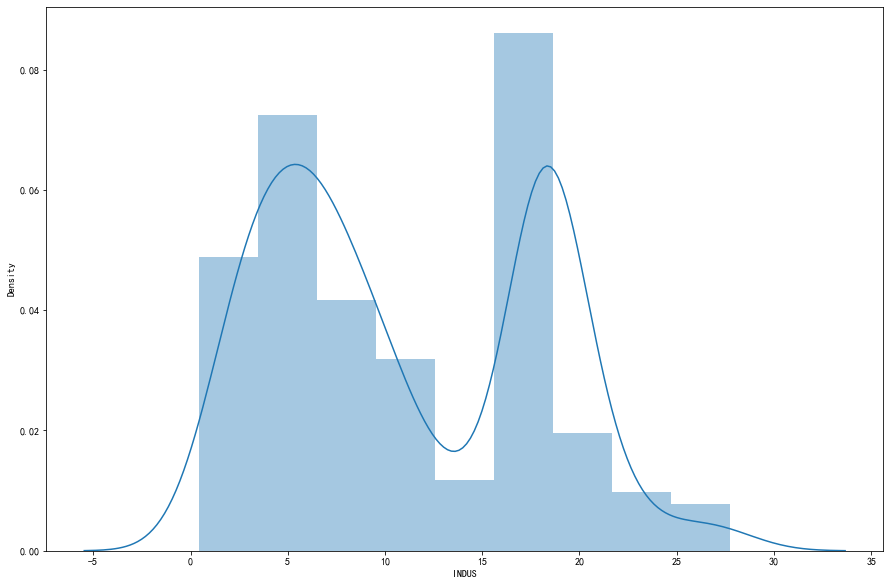

In [20]:
sns.distplot(df['INDUS'])
# 两个峰值

C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RAD', ylabel='Density'>

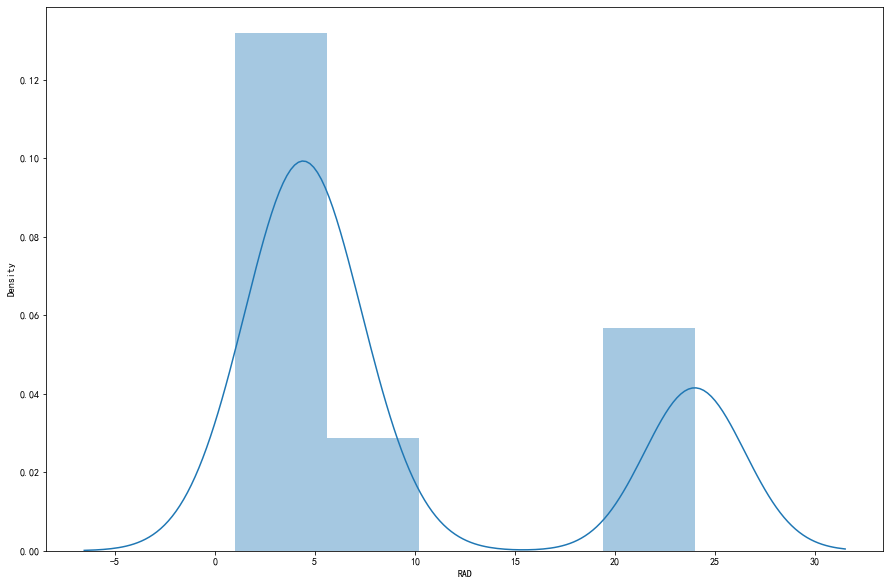

In [21]:
sns.distplot(df['RAD'])
# 两个峰值

C:\Users\admin\anaconda3\envs\k1py37ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

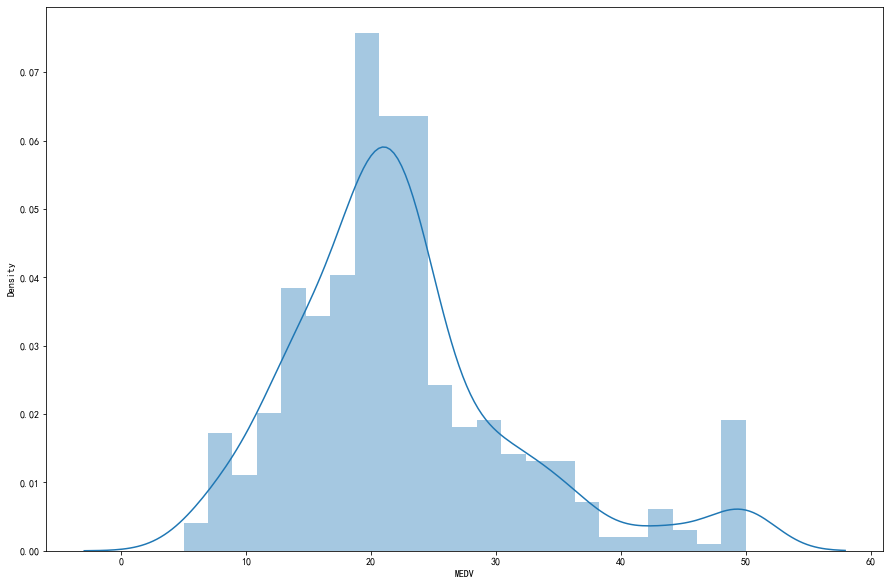

In [22]:
sns.distplot(df['MEDV'])
#接近正态分布

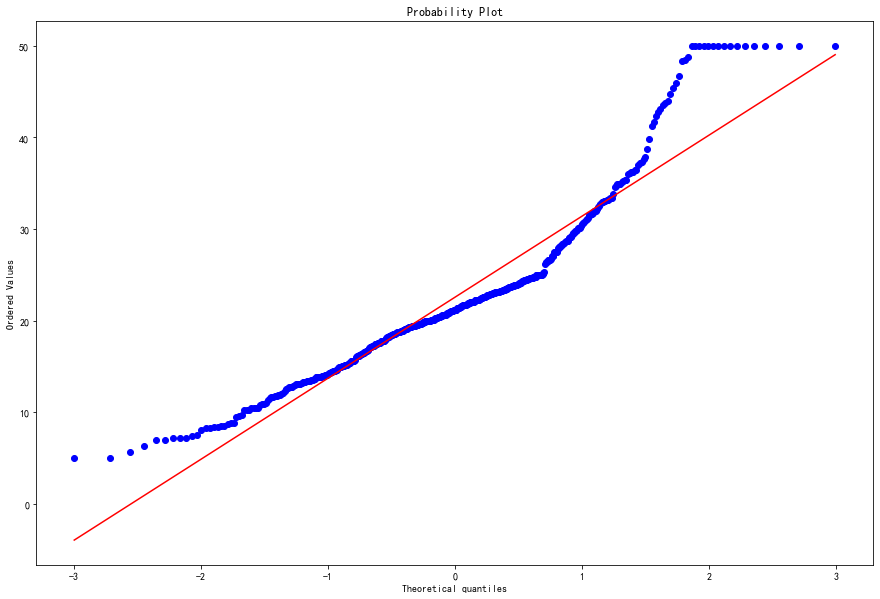

In [23]:
from scipy import stats
res = stats.probplot(df['MEDV'],plot=plt)
# 如果符合正态分布，蓝点应当接近红线分布

<AxesSubplot:>

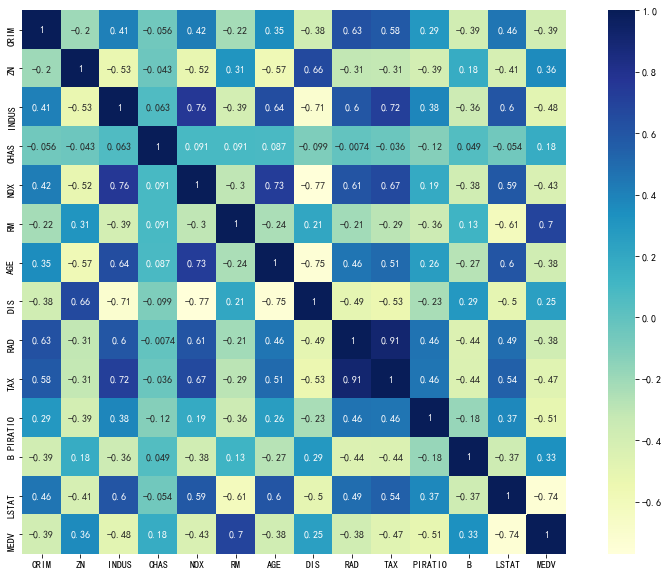

In [24]:
# 绘制变量间相关性系数热力图
sns.heatmap(df.corr(),square=True,annot=True,cmap='YlGnBu')

In [25]:
# 设置绘图狭小
plt.style.use({'figure.figsize':(10,8)})

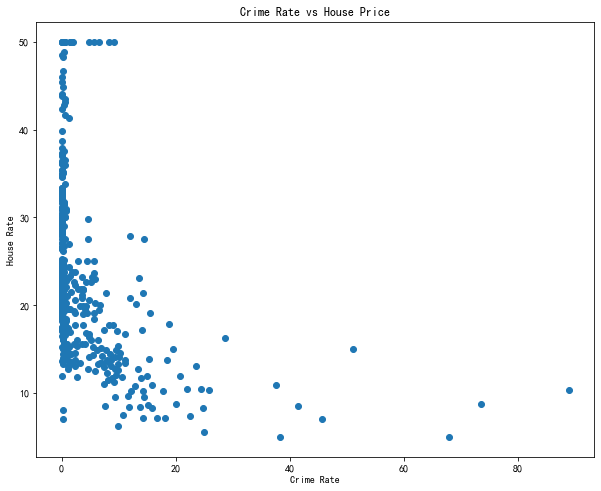

In [26]:
plt.scatter(df['CRIM'],df['MEDV'])
plt.title('Crime Rate vs House Price')
plt.xlabel('Crime Rate')
plt.ylabel('House Rate')
plt.show()

In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PIRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

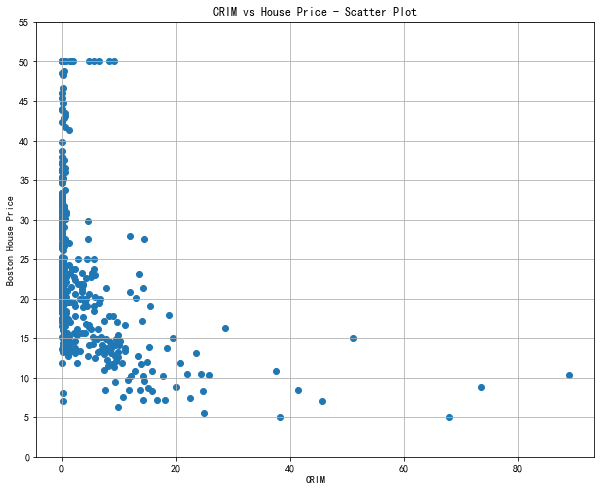

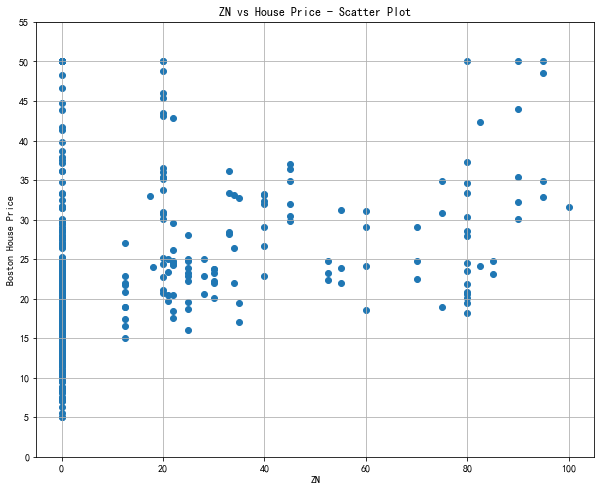

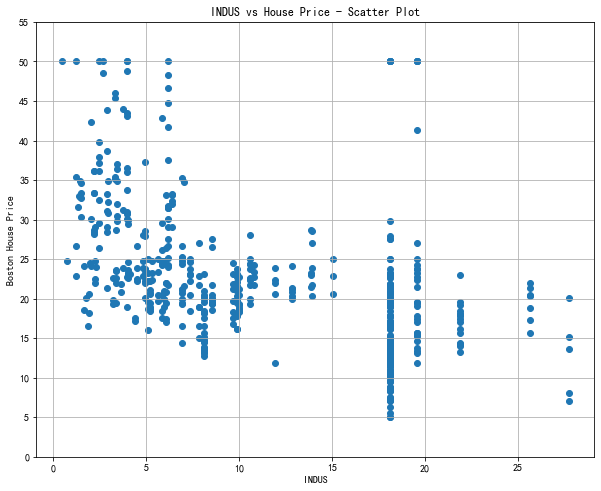

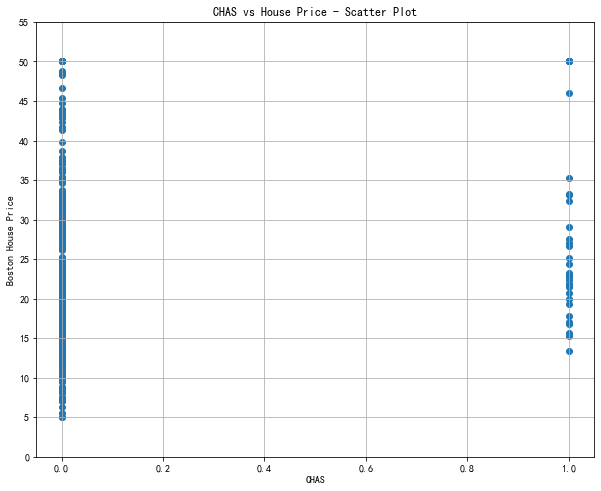

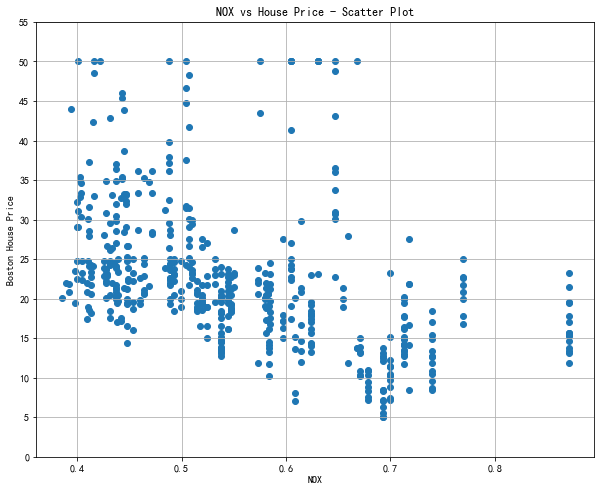

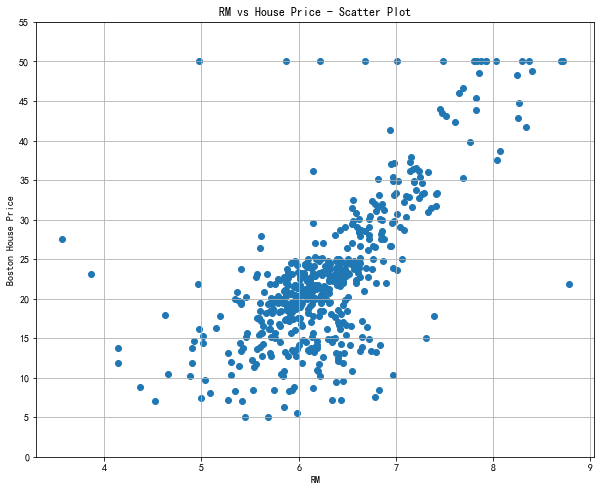

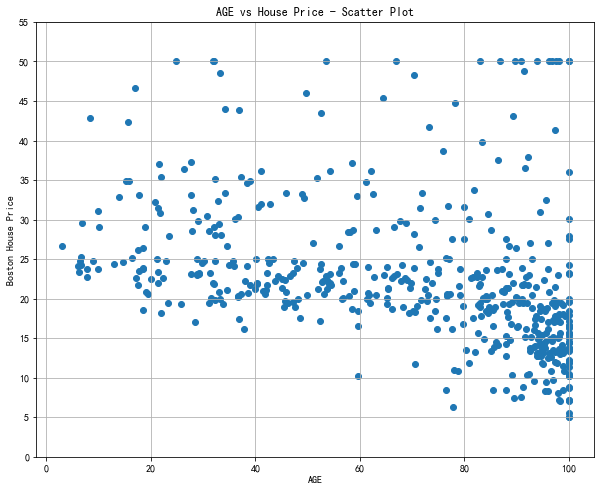

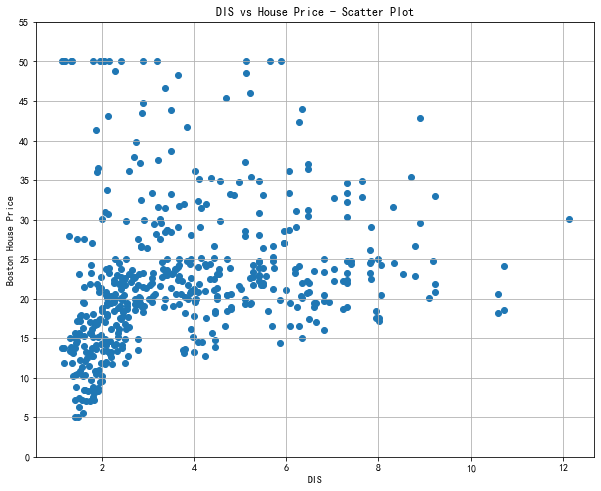

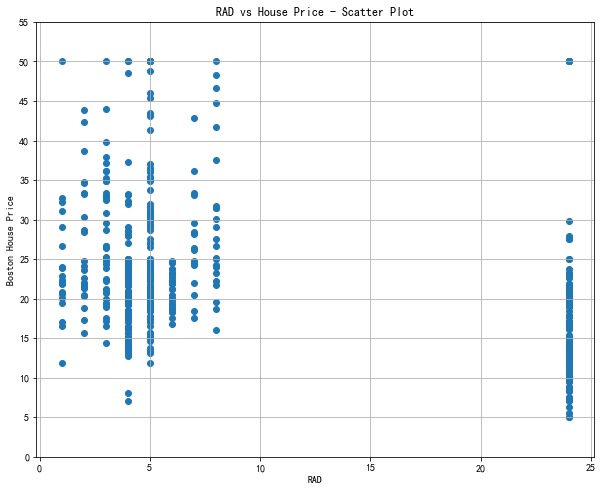

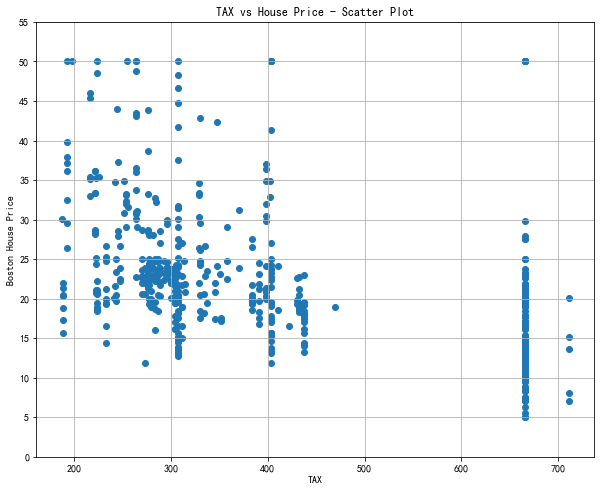

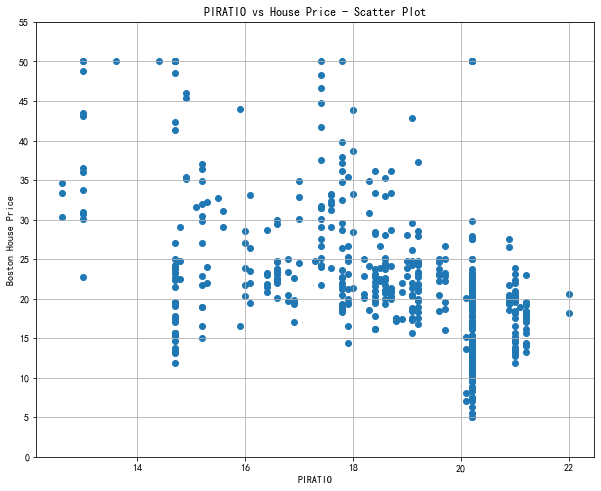

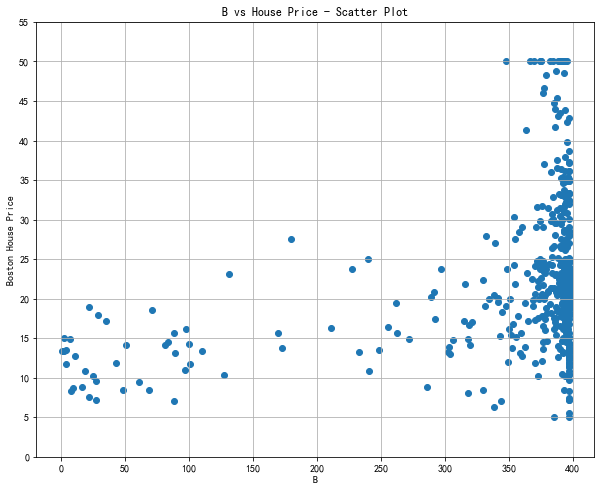

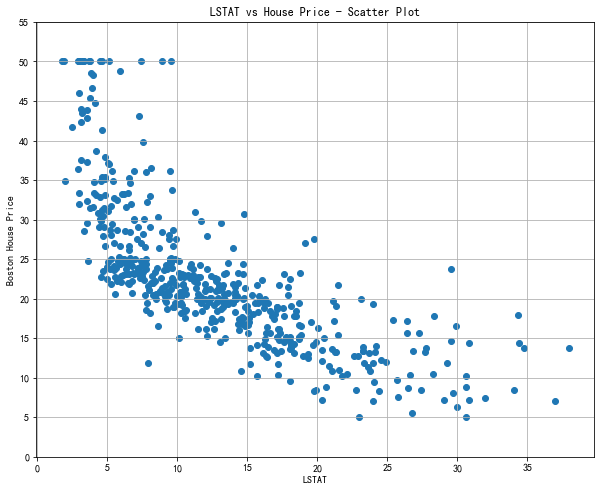

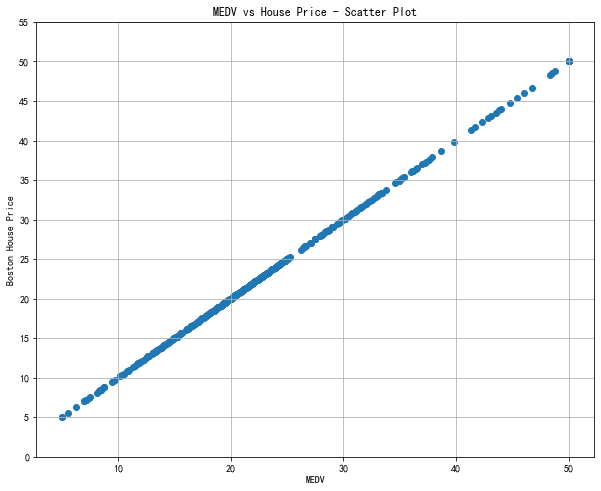

In [28]:
for each in df.columns:
    plt.scatter(df[each],df['MEDV'])
    plt.title('{} vs House Price - Scatter Plot'.format(each))
    plt.xlabel(each)
    plt.ylabel('Boston House Price')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()
    
# 商业用地越多，房价越高；一氧化碳浓度越低，房价越高；房间越多，房价越高
# 学生越少教师越多，房价越高； 低收入阶层占比越低，房价越高

### 特征选择 Feature Selection

In [29]:
dropColumn=['MEDV']
x=df.drop(dropColumn,axis=1)

In [30]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [31]:
y=df['MEDV']

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression,k=3)
bestFeature = SelectKBest.fit_transform(x,y)
FeatureIndex=SelectKBest.get_support()
x.columns[FeatureIndex]

Index(['RM', 'PIRATIO', 'LSTAT'], dtype='object')

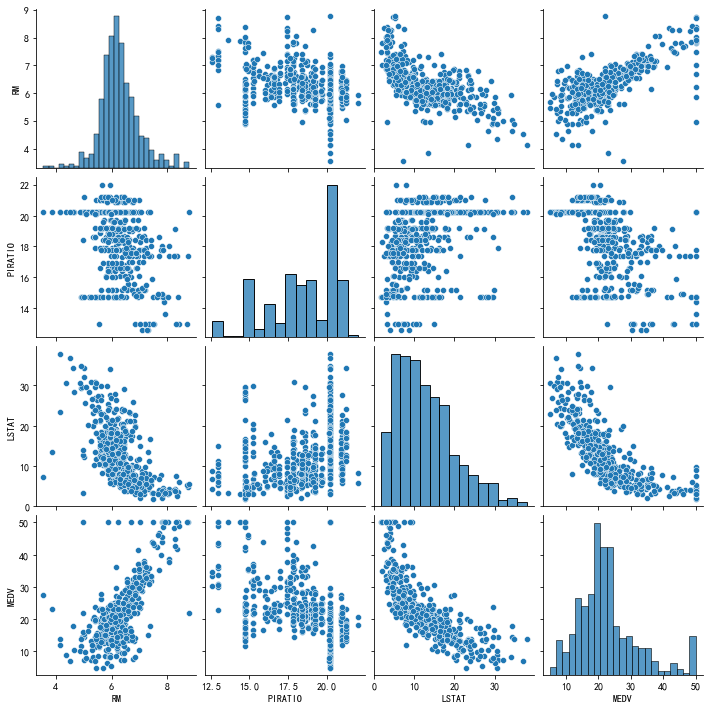

In [33]:
sns.pairplot(df[['RM', 'PIRATIO', 'LSTAT','MEDV']])

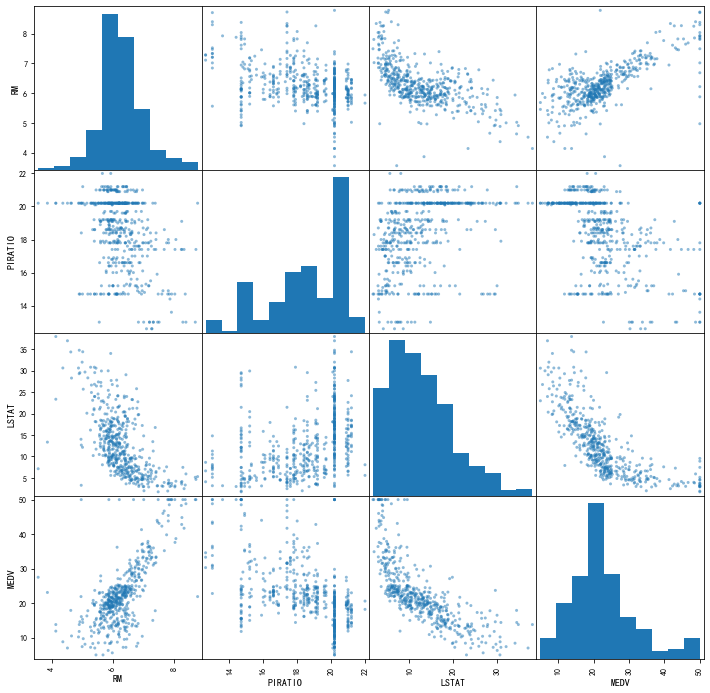

In [34]:
#pandas 自带绘图
cols=['RM', 'PIRATIO', 'LSTAT','MEDV']
pd.plotting.scatter_matrix(df[cols],alpha=0.5,figsize=(12,12))
plt.show()

### 特征归一化 Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for feature in df.columns:
    df['标准化'+feature] = scaler.fit_transform(df[[feature]])

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,标准化NOX,标准化RM,标准化AGE,标准化DIS,标准化RAD,标准化TAX,标准化PIRATIO,标准化B,标准化LSTAT,标准化MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
